In [ ]:
# Try importing patoolib module. If it's not available, attempt to install it using pip and then import it.
try:
    import patoolib
except ImportError:
  %pip install patool # Install patool package
  import patoolib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 3.5 MB/s eta 0:00:00


This Python code tries to use a tool called "patoolib" in a program. If it's not available, the code tries to install it automatically using a tool called "pip". After installing, it tries to use "patoolib" again. This helps make sure the program can run smoothly even if "patoolib" isn't installed initially.

It provides a convenient way to handle the installation of dependencies on-the-fly if they are missing, making your code more robust and user-friendly.

In [ ]:
# Extract the contents of the 'IPL_Dataset1.zip' file using patoolib.
patoolib.extract_archive('IPL_Dataset1.zip')

INFO patool: Extracting IPL_Dataset1.zip ...
INFO:patool:Extracting IPL_Dataset1.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_n9nggn5m -- IPL_Dataset1.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_n9nggn5m -- IPL_Dataset1.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... IPL_Dataset1.zip extracted to `IPL_Dataset'.
INFO:patool:... IPL_Dataset1.zip extracted to `IPL_Dataset'.


'IPL_Dataset'

The patoolib.extract_archive() function to extract the contents of the 'IPL_Dataset1.zip' file.

In [ ]:
#importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from torch.utils.data import random_split , DataLoader
from tqdm import tqdm

# Check if CUDA is available and set PyTorch to use GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Device: {device}")

Device: cuda


In [ ]:
# Set the random seed
seed = 99
torch.manual_seed(seed)

if device.type == "cuda":
    torch.cuda.manual_seed(seed)


In [ ]:
# Define transformations for the training data and testing data
transform = transforms.Compose([transforms.Resize(256), # Resize the image to 256x256 pixels
                                transforms.CenterCrop(224), # Crop the center of the image to 224x224 pixels
                                transforms.ToTensor(), # Convert the image to a PyTorch tensor
                                transforms.Normalize(mean=[0.5, 0.5, 0.5], # Normalize the image pixel values
                                                     std=[0.5, 0.5, 0.5])])

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Load the dataset from the folder
train_dataset = ImageFolder(root='/content/IPL_Dataset/Train', transform=transform)
print("Length of the train dataset:", len(train_dataset))

# Split the dataset into training and validation sets
train_size = int(0.9 * len(train_dataset))  # Use 90% of the data for training
val_size = len(train_dataset) - train_size
trainset, valset = random_split(train_dataset, [train_size, val_size])
print("Trainset",len(trainset), "Validationset",len(valset))
# Define batch size for DataLoader
batch_size = 16

# Create DataLoader for training set
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True,pin_memory=True)

# Create DataLoader for validation set
valloader = DataLoader(valset, batch_size=batch_size, shuffle=False,pin_memory=True)

# Create DataLoader for Test set
test_dataset = ImageFolder(root='/content/IPL_Dataset/Test', transform=transform)
testloader = DataLoader(valset, batch_size=batch_size, shuffle=False)
print("Length of the test dataset:", len(test_dataset))

Length of the train dataset: 7500
Trainset 6750 Validationset 750
Length of the test dataset: 10


In [ ]:
# Extracts a batch of data (images and their corresponding labels) from the trainloader DataLoader object.
imgs, l = next(iter(trainloader)) # 'imgs' contains the images in the batch, and 'l' contains their corresponding labels.
print(imgs.shape, l)

torch.Size([16, 3, 224, 224]) tensor([1, 0, 4, 9, 5, 8, 9, 0, 3, 7, 1, 7, 7, 4, 1, 9])


In [ ]:
# Install the OpenCV library using pip if it's not already installed
!pip install opencv-python

# Import the OpenCV library for computer vision tasks
import cv2

Shape of Image 1: (171, 294, 3)
Shape of Image 2: (183, 275, 3)


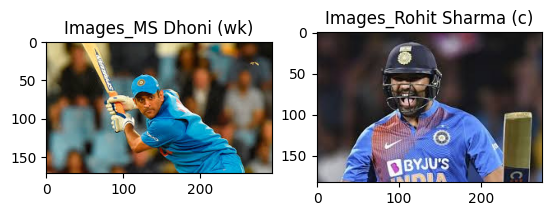

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Define file paths for two example images
EXAMPLE_IMG_PATH1 = "/content/IPL_Dataset/Train/CSK/Images_MS Dhoni (wk)/MS Dhoni (wk)1.jpg"
EXAMPLE_IMG_PATH2 = "/content/IPL_Dataset/Train/MI/Images_Rohit Sharma (c)/Rohit Sharma (c)1.jpg"

# Read the images using OpenCV
img1 = cv2.imread(EXAMPLE_IMG_PATH1)
img2 = cv2.imread(EXAMPLE_IMG_PATH2)

# Check if both images are successfully loaded
if img1 is not None and img2 is not None:
    print(f"Shape of Image 1: {img1.shape}")
    print(f"Shape of Image 2: {img2.shape}")

    # Extract the class information from the file paths
    class1 = EXAMPLE_IMG_PATH1.split("/")[-2]  # Extract "CSK"
    class2 = EXAMPLE_IMG_PATH2.split("/")[-2]  # Extract "MI"

    # Display both images using matplotlib with class labels
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(f"{class1}")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(f"{class2}")

    plt.show()
else:
    # Print a message if one or both of the images fail to load
    print("Failed to load one or both of the images. Please check the file paths.")


The code loads two images using OpenCV (cv2.imread) from specified file paths.

It checks if both images are loaded successfully.

If both images are loaded, it prints their shapes and displays them side by side using Matplotlib (plt.imshow).

If one or both images fail to load, it prints a message about the failure.

In [ ]:
#Load pre-trained model & freeze the layers

import torchvision.models as models
import torch.nn as nn

# Load pre-trained model
model = models.resnet18(pretrained=True)

# Unfreeze the last few layers for fine-tuning
for param in model.parameters():
    param.requires_grad = False

# Modify the fully connected layer to match the number of classes in your dataset
num_classes = 10  # Change this to the number of classes in your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Print the model architecture to confirm the changes
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

The code takes a pre-trained ResNet18 model from torchvision.

It stops all layers from updating their weights during training (param.requires_grad = False).

The fully connected layer (model.fc) is swapped with a new linear layer to match the dataset's class count.

The modified model's architecture is printed.

In [ ]:
# Move the model to the GPU if available -

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Model is now on {device}")

Model is now on cuda


In [ ]:
# Define a loss function and optimizer -

criterion = nn.CrossEntropyLoss() # Use CrossEntropyLoss as the loss function for classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.02) # Use Adam optimizer for updating the weights of the model parameters

# Print the chosen loss function and optimizer for confirmation
print(f"Loss_Function: {criterion}")
print(f"Optimizer: {optimizer}")

Loss_Function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.02
    maximize: False
    weight_decay: 0
)


The loss function (criterion) is set to nn.CrossEntropyLoss(), which is commonly used for classification tasks. It calculates the loss by comparing the model's predicted probabilities to the actual class labels.

The optimizer (optimizer) is set to optim.Adam(model.parameters(), lr=0.02), which initializes the Adam optimizer with a learning rate of 0.02. Adam optimizer is widely used for training neural networks as it adapts the learning rate for each parameter individually.

Finally, it prints out the chosen loss function and optimizer for confirmation.

  0%|          | 0/50 [00:00<?, ?it/s]

Training Loss: 4.628, Training Accuracy: 11.47%
Validation Loss: 4.170, Validation Accuracy: 14.07%

Confusion Matrix for Epoch 1:


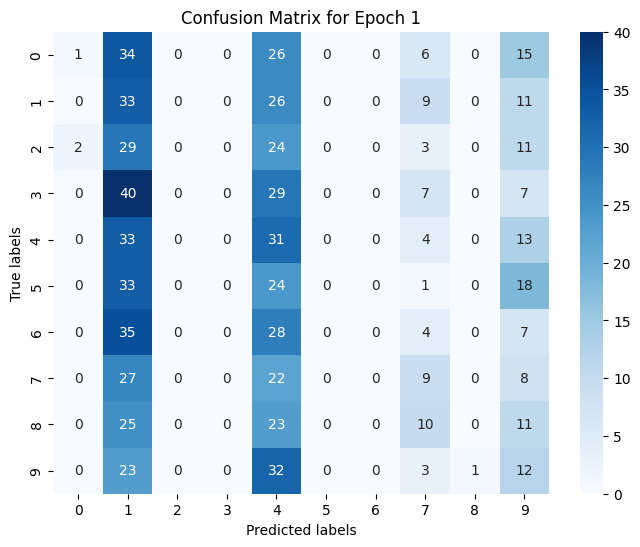

  2%|▏         | 1/50 [00:35<29:05, 35.62s/it]


Training Loss: 3.878, Training Accuracy: 13.87%
Validation Loss: 3.864, Validation Accuracy: 16.46%

Confusion Matrix for Epoch 2:


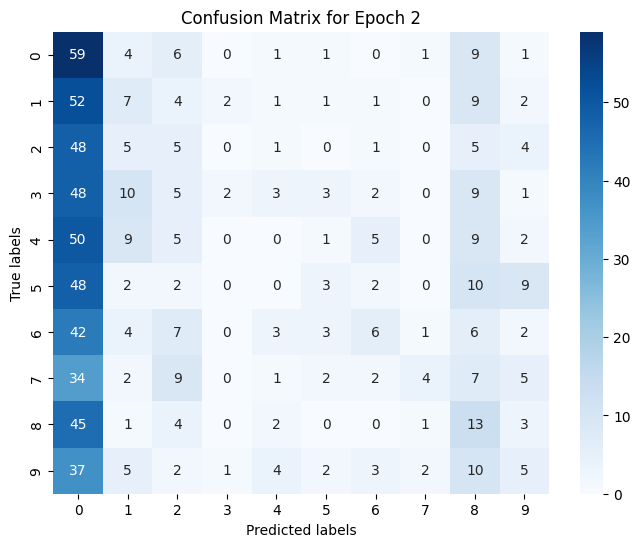

  4%|▍         | 2/50 [01:08<27:20, 34.18s/it]


Training Loss: 4.786, Training Accuracy: 14.93%
Validation Loss: 3.939, Validation Accuracy: 18.39%

Confusion Matrix for Epoch 3:


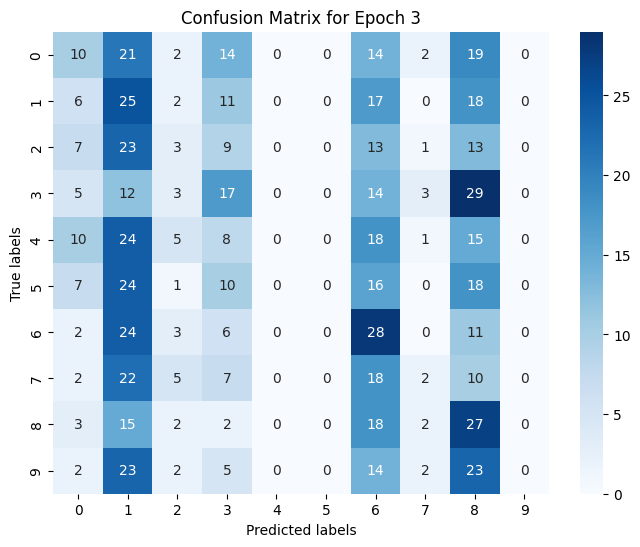

  6%|▌         | 3/50 [01:42<26:29, 33.81s/it]


Training Loss: 4.670, Training Accuracy: 16.80%
Validation Loss: 4.084, Validation Accuracy: 17.33%

Confusion Matrix for Epoch 4:


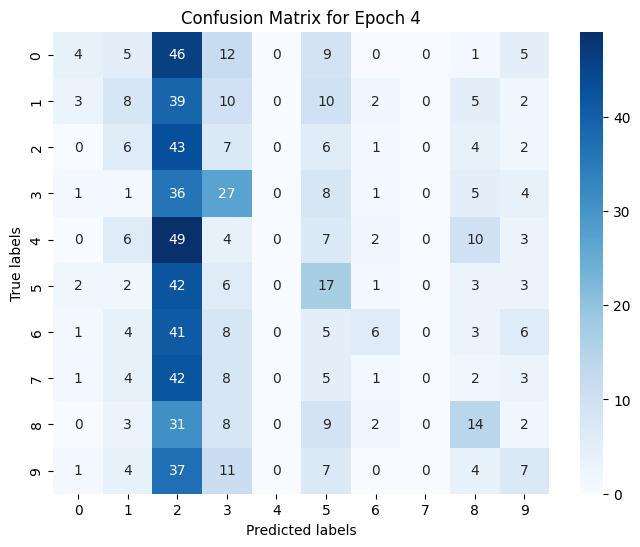

  8%|▊         | 4/50 [02:15<25:47, 33.64s/it]


Training Loss: 4.064, Training Accuracy: 15.33%
Validation Loss: 3.919, Validation Accuracy: 19.14%

Confusion Matrix for Epoch 5:


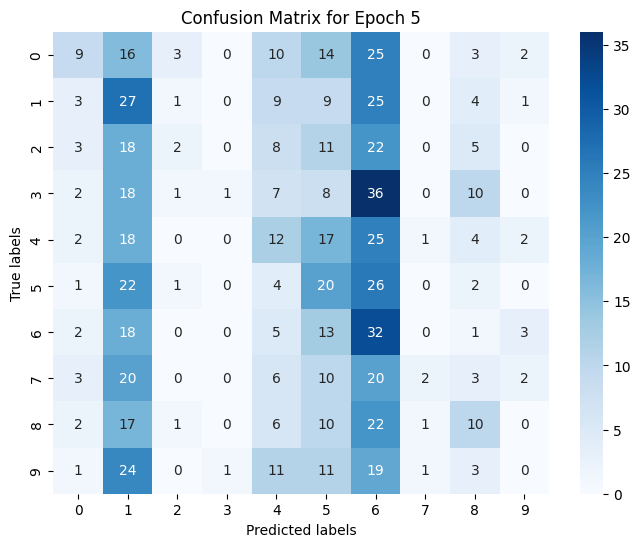

 10%|█         | 5/50 [02:48<25:03, 33.41s/it]


Training Loss: 4.286, Training Accuracy: 16.93%
Validation Loss: 4.144, Validation Accuracy: 19.17%

Confusion Matrix for Epoch 6:


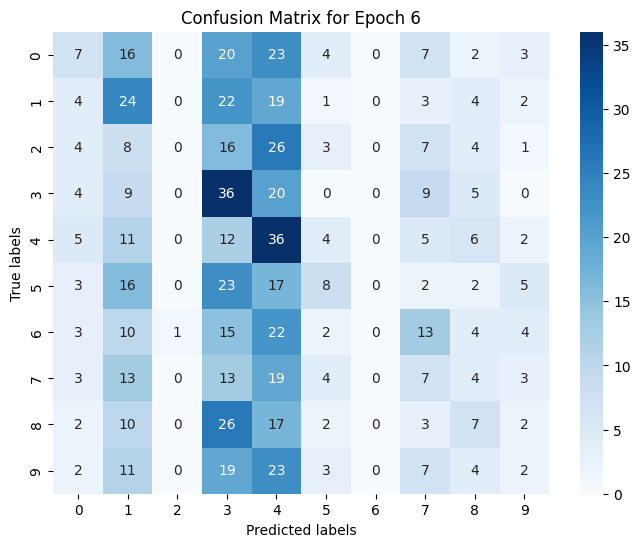

 12%|█▏        | 6/50 [03:21<24:28, 33.37s/it]


Training Loss: 4.027, Training Accuracy: 15.33%
Validation Loss: 3.976, Validation Accuracy: 19.47%

Confusion Matrix for Epoch 7:


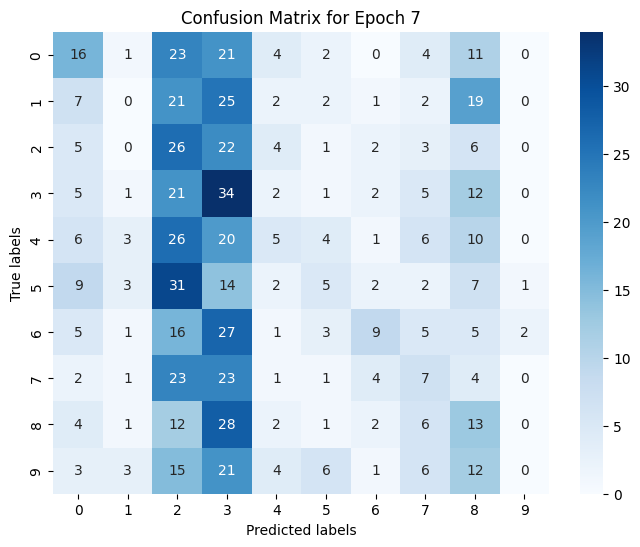

 14%|█▍        | 7/50 [03:54<23:51, 33.28s/it]


Training Loss: 3.964, Training Accuracy: 16.80%
Validation Loss: 4.039, Validation Accuracy: 19.20%

Confusion Matrix for Epoch 8:


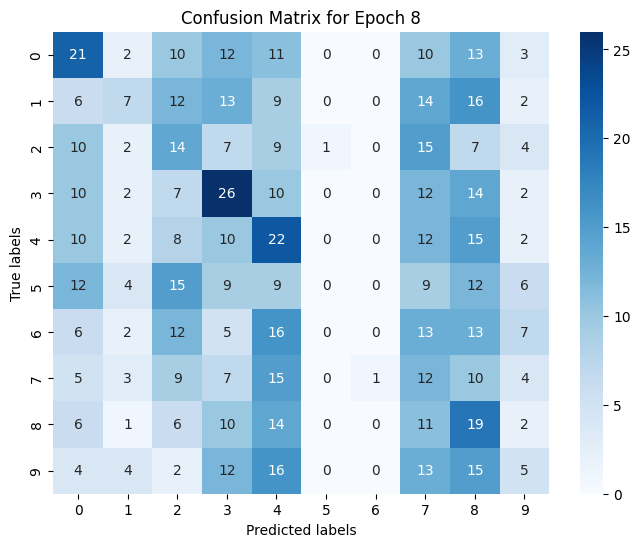

 16%|█▌        | 8/50 [04:27<23:10, 33.10s/it]


Training Loss: 4.538, Training Accuracy: 17.47%
Validation Loss: 3.996, Validation Accuracy: 19.66%

Confusion Matrix for Epoch 9:


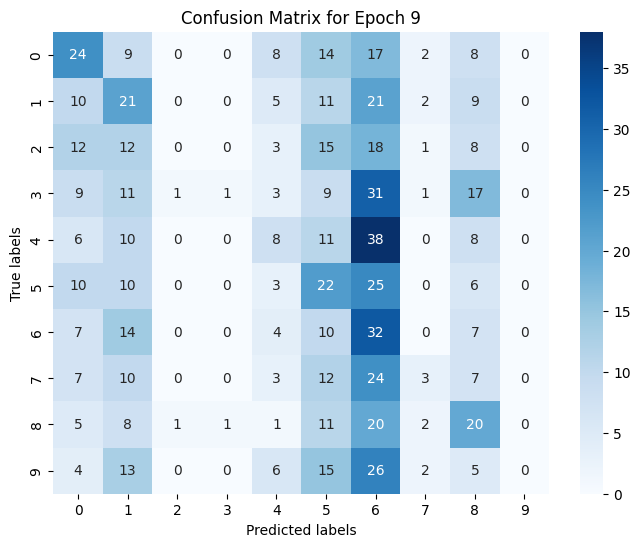

 18%|█▊        | 9/50 [05:00<22:37, 33.12s/it]


Training Loss: 4.314, Training Accuracy: 16.40%
Validation Loss: 4.135, Validation Accuracy: 19.30%

Confusion Matrix for Epoch 10:


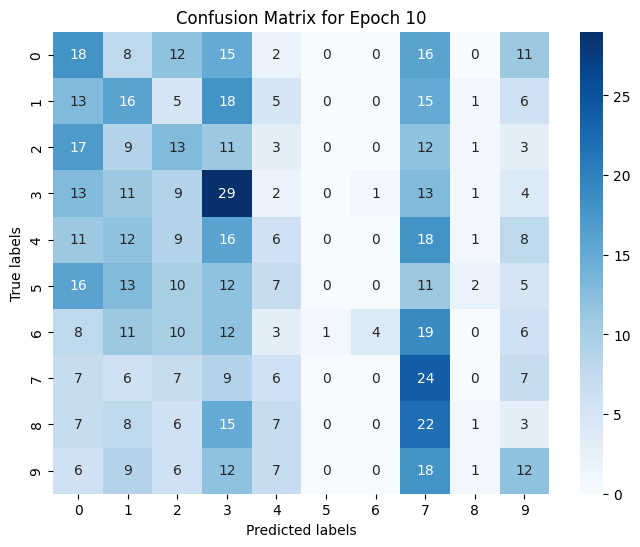

 20%|██        | 10/50 [05:34<22:10, 33.27s/it]


Training Loss: 3.956, Training Accuracy: 16.13%
Validation Loss: 4.081, Validation Accuracy: 19.60%

Confusion Matrix for Epoch 11:


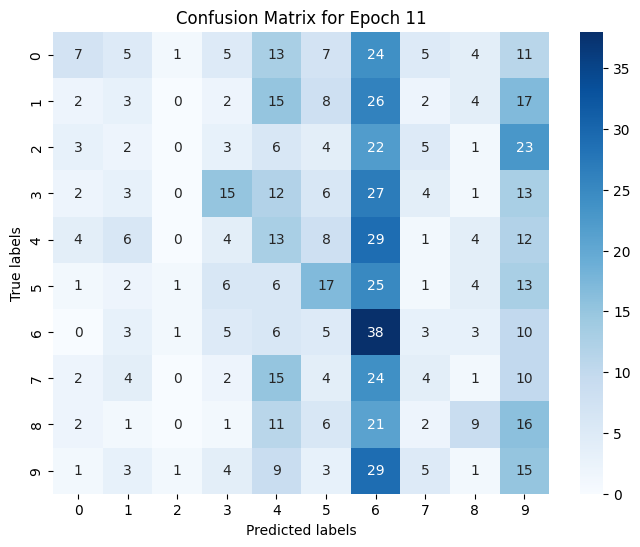

 22%|██▏       | 11/50 [06:08<21:41, 33.38s/it]


Training Loss: 4.068, Training Accuracy: 16.27%
Validation Loss: 3.993, Validation Accuracy: 19.69%

Confusion Matrix for Epoch 12:


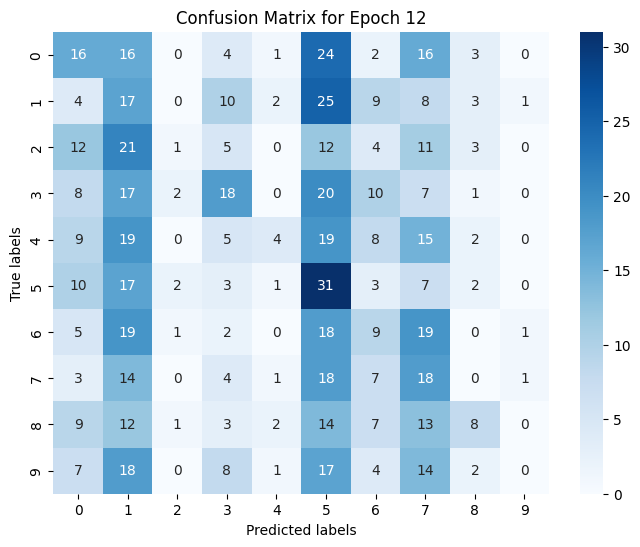

 24%|██▍       | 12/50 [06:41<21:11, 33.47s/it]


Training Loss: 4.926, Training Accuracy: 17.33%
Validation Loss: 4.163, Validation Accuracy: 19.76%

Confusion Matrix for Epoch 13:


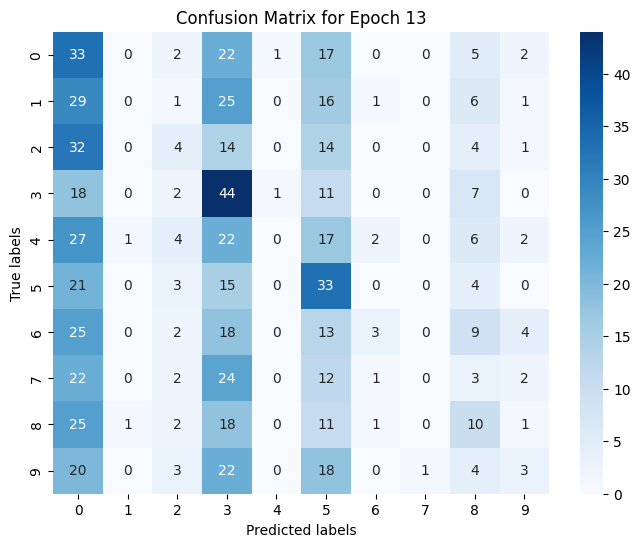

 26%|██▌       | 13/50 [07:14<20:35, 33.39s/it]


Training Loss: 4.710, Training Accuracy: 13.47%
Validation Loss: 4.090, Validation Accuracy: 20.46%

Confusion Matrix for Epoch 14:


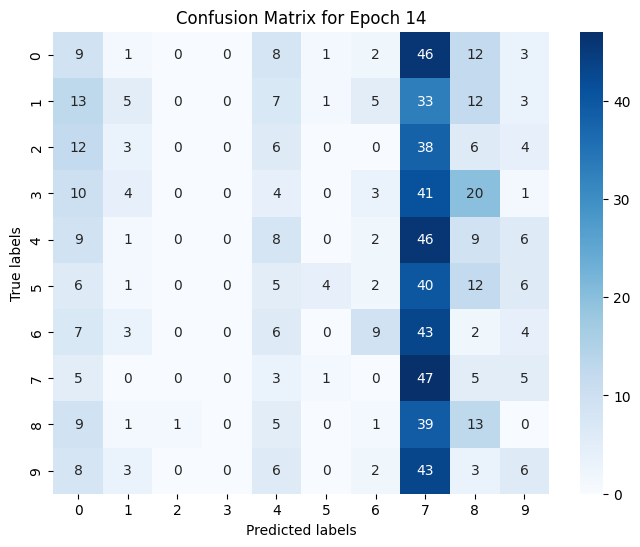

 28%|██▊       | 14/50 [07:48<20:00, 33.34s/it]


Training Loss: 4.521, Training Accuracy: 15.73%
Validation Loss: 4.227, Validation Accuracy: 20.28%

Confusion Matrix for Epoch 15:


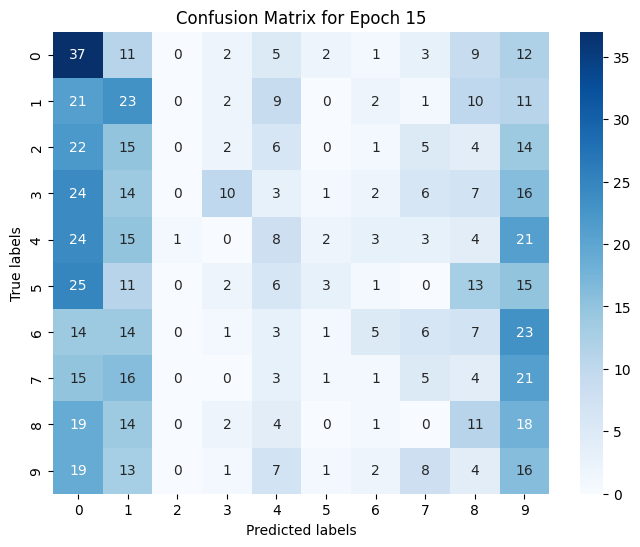

 30%|███       | 15/50 [08:21<19:25, 33.29s/it]


Training Loss: 4.854, Training Accuracy: 13.87%
Validation Loss: 4.090, Validation Accuracy: 20.49%

Confusion Matrix for Epoch 16:


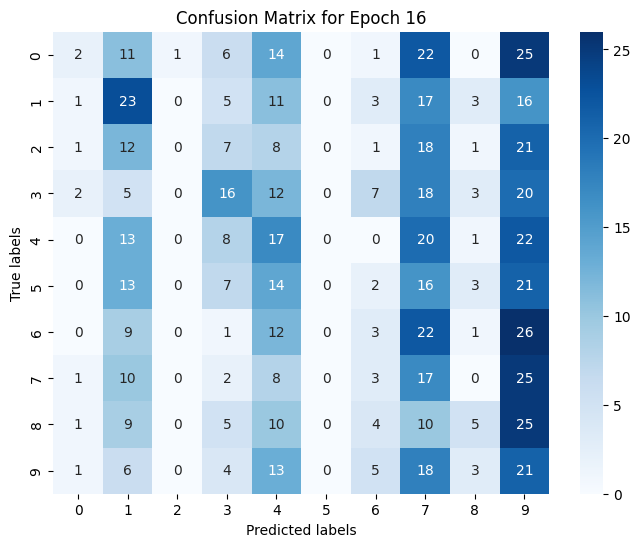

 32%|███▏      | 16/50 [08:54<18:51, 33.28s/it]


Training Loss: 4.499, Training Accuracy: 16.27%
Validation Loss: 4.319, Validation Accuracy: 19.56%

Confusion Matrix for Epoch 17:


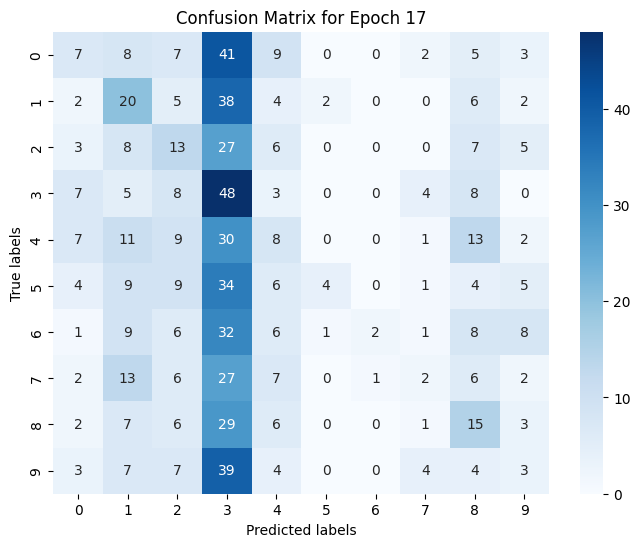

 34%|███▍      | 17/50 [09:27<18:19, 33.32s/it]


Training Loss: 4.993, Training Accuracy: 13.73%
Validation Loss: 4.015, Validation Accuracy: 20.13%

Confusion Matrix for Epoch 18:


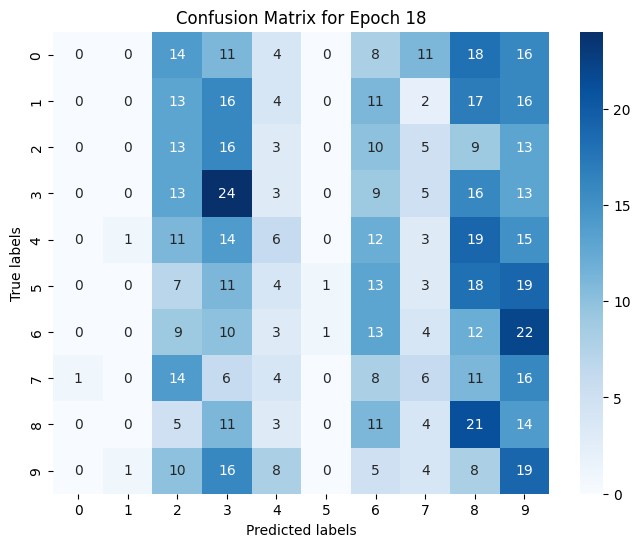

 36%|███▌      | 18/50 [10:01<17:51, 33.48s/it]


Training Loss: 4.529, Training Accuracy: 14.80%
Validation Loss: 4.081, Validation Accuracy: 20.71%

Confusion Matrix for Epoch 19:


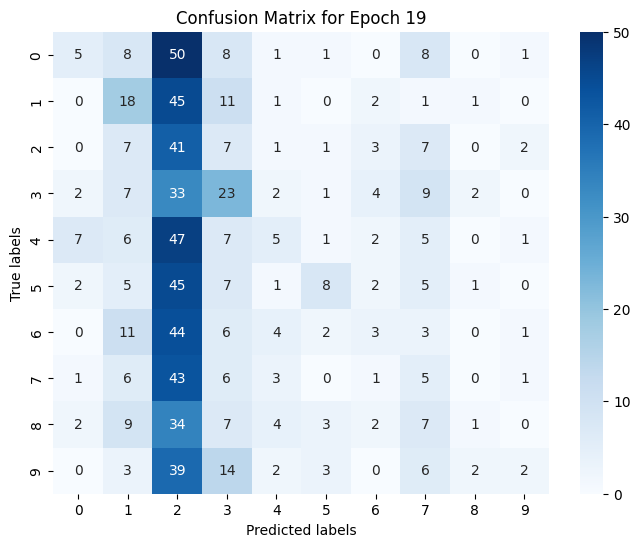

 38%|███▊      | 19/50 [10:35<17:17, 33.48s/it]


Training Loss: 4.580, Training Accuracy: 15.73%
Validation Loss: 3.970, Validation Accuracy: 21.04%

Confusion Matrix for Epoch 20:


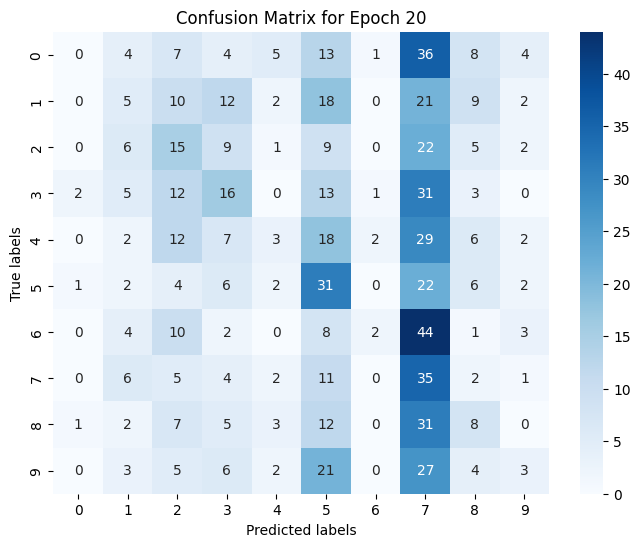

 40%|████      | 20/50 [11:08<16:43, 33.45s/it]


Training Loss: 5.645, Training Accuracy: 11.73%
Validation Loss: 4.228, Validation Accuracy: 20.10%

Confusion Matrix for Epoch 21:


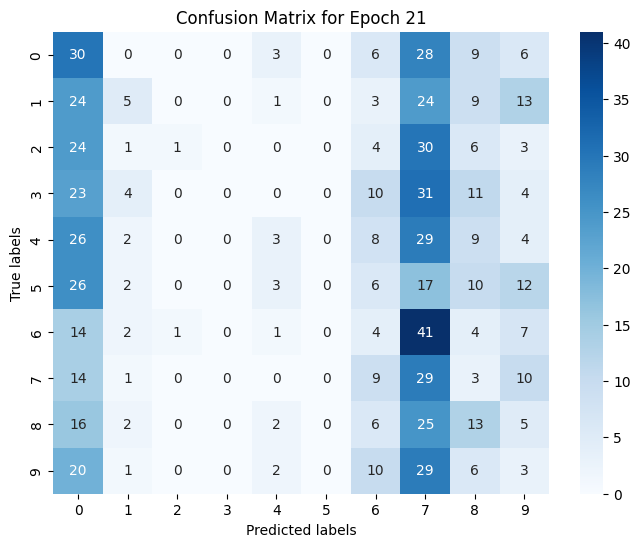

 42%|████▏     | 21/50 [11:42<16:12, 33.54s/it]


Training Loss: 5.380, Training Accuracy: 11.87%
Validation Loss: 4.088, Validation Accuracy: 20.76%

Confusion Matrix for Epoch 22:


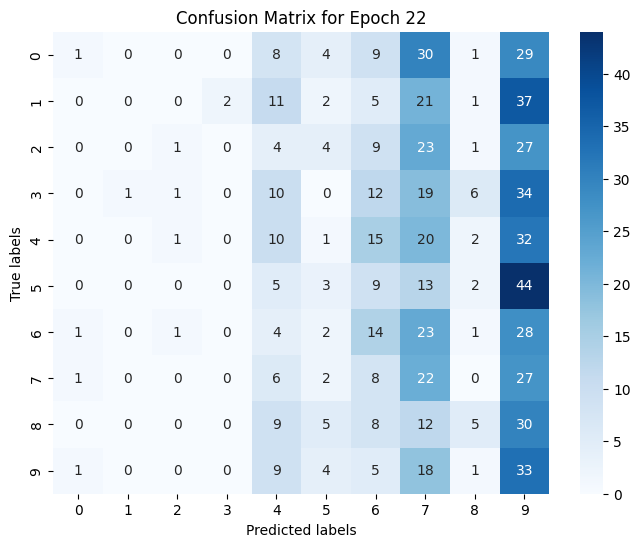

 44%|████▍     | 22/50 [12:15<15:38, 33.54s/it]


Training Loss: 5.747, Training Accuracy: 14.67%
Validation Loss: 4.147, Validation Accuracy: 20.12%

Confusion Matrix for Epoch 23:


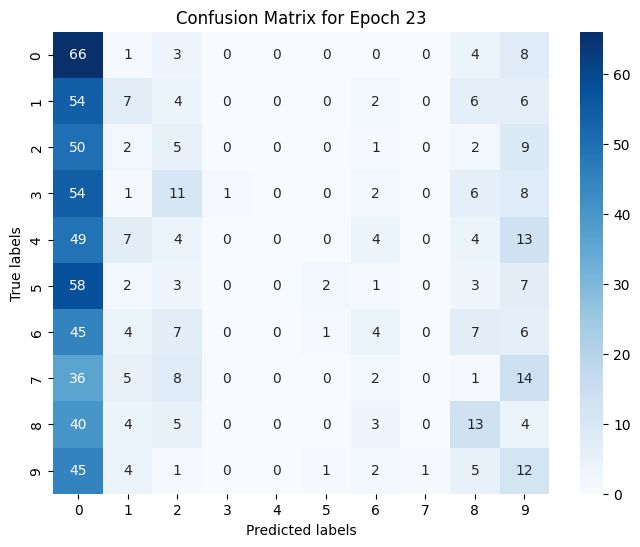

 46%|████▌     | 23/50 [12:49<15:03, 33.47s/it]


Training Loss: 5.903, Training Accuracy: 13.87%
Validation Loss: 4.265, Validation Accuracy: 19.11%

Confusion Matrix for Epoch 24:


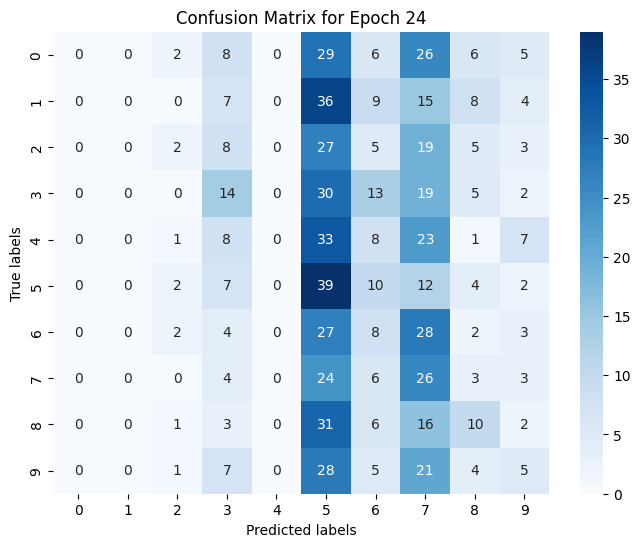

 48%|████▊     | 24/50 [13:22<14:29, 33.45s/it]


Training Loss: 4.420, Training Accuracy: 15.73%
Validation Loss: 4.114, Validation Accuracy: 20.31%

Confusion Matrix for Epoch 25:


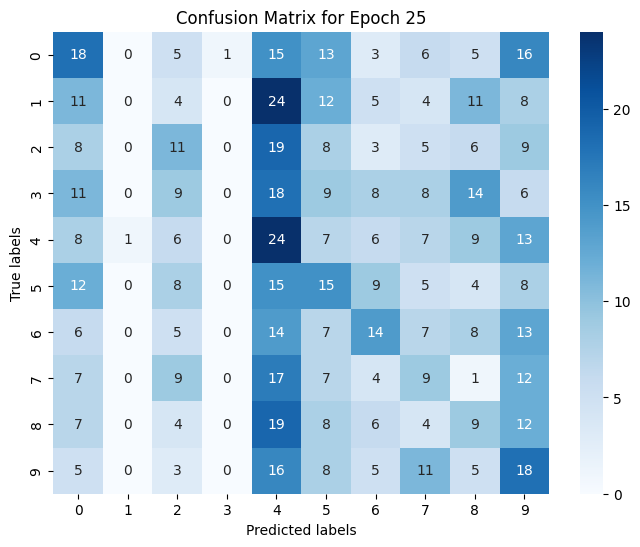

 50%|█████     | 25/50 [13:56<14:00, 33.63s/it]


Training Loss: 4.957, Training Accuracy: 14.80%
Validation Loss: 4.074, Validation Accuracy: 20.36%

Confusion Matrix for Epoch 26:


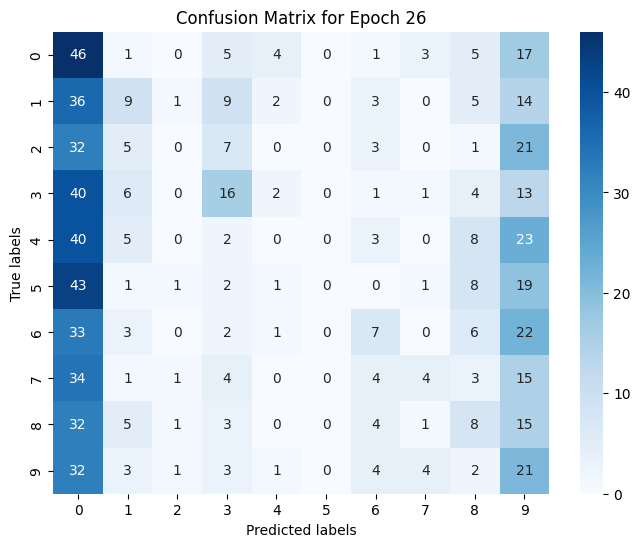

 52%|█████▏    | 26/50 [14:30<13:27, 33.64s/it]


Training Loss: 4.959, Training Accuracy: 15.73%
Validation Loss: 4.114, Validation Accuracy: 20.34%

Confusion Matrix for Epoch 27:


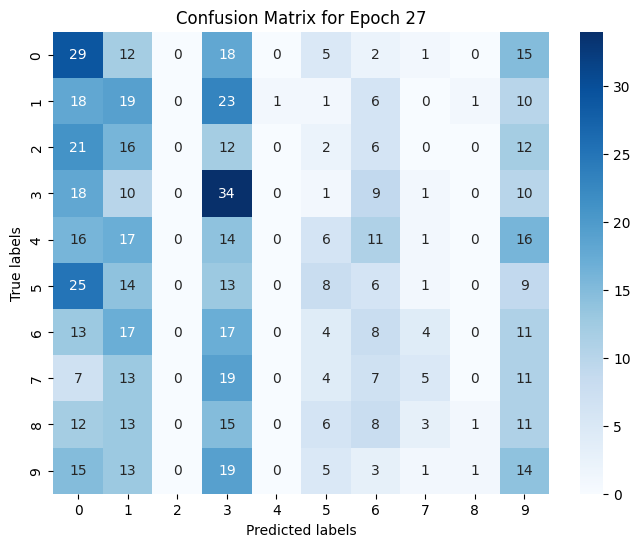

 54%|█████▍    | 27/50 [15:03<12:52, 33.57s/it]


Training Loss: 4.594, Training Accuracy: 16.27%
Validation Loss: 4.159, Validation Accuracy: 20.98%

Confusion Matrix for Epoch 28:


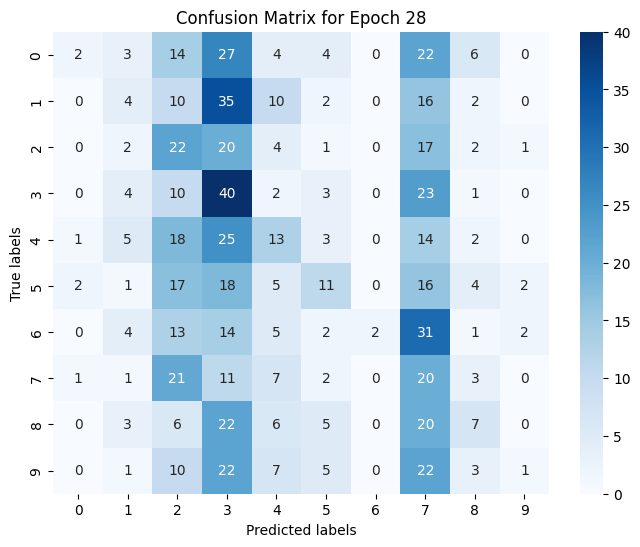

 56%|█████▌    | 28/50 [15:37<12:17, 33.52s/it]


Training Loss: 5.636, Training Accuracy: 17.73%
Validation Loss: 4.134, Validation Accuracy: 20.40%

Confusion Matrix for Epoch 29:


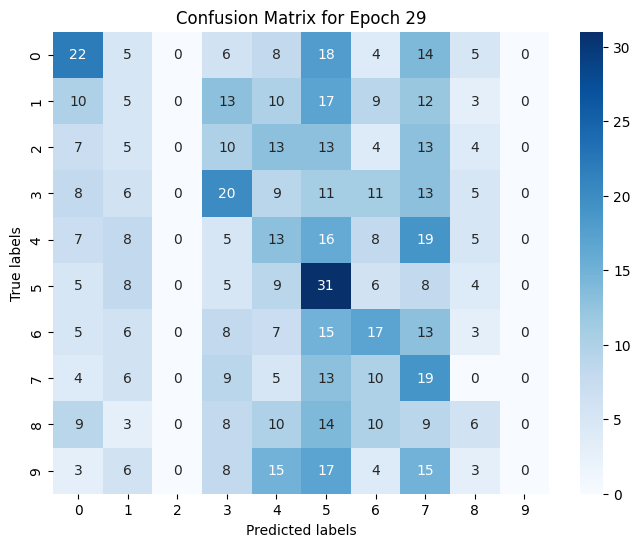

 58%|█████▊    | 29/50 [16:11<11:45, 33.60s/it]


Training Loss: 4.889, Training Accuracy: 16.13%
Validation Loss: 4.046, Validation Accuracy: 20.80%

Confusion Matrix for Epoch 30:


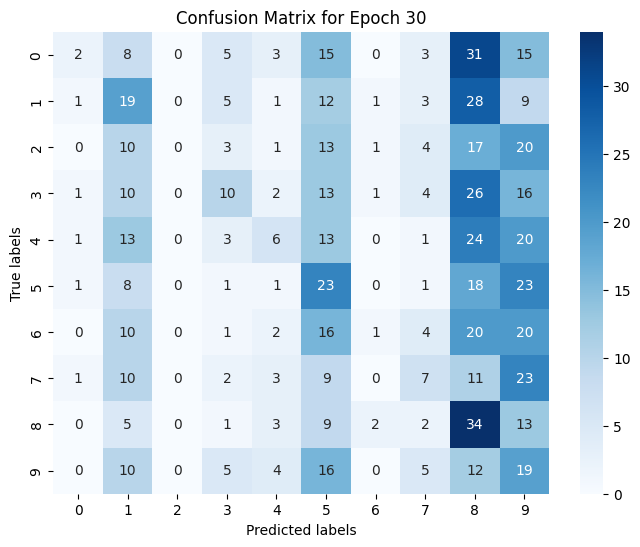

 60%|██████    | 30/50 [16:44<11:11, 33.60s/it]


Training Loss: 4.806, Training Accuracy: 15.07%
Validation Loss: 4.000, Validation Accuracy: 20.36%

Confusion Matrix for Epoch 31:


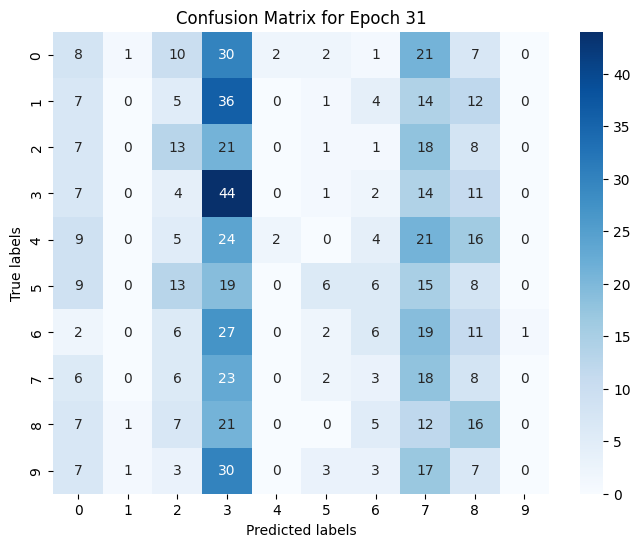

 62%|██████▏   | 31/50 [17:18<10:39, 33.65s/it]


Training Loss: 4.031, Training Accuracy: 16.13%
Validation Loss: 4.175, Validation Accuracy: 19.69%

Confusion Matrix for Epoch 32:


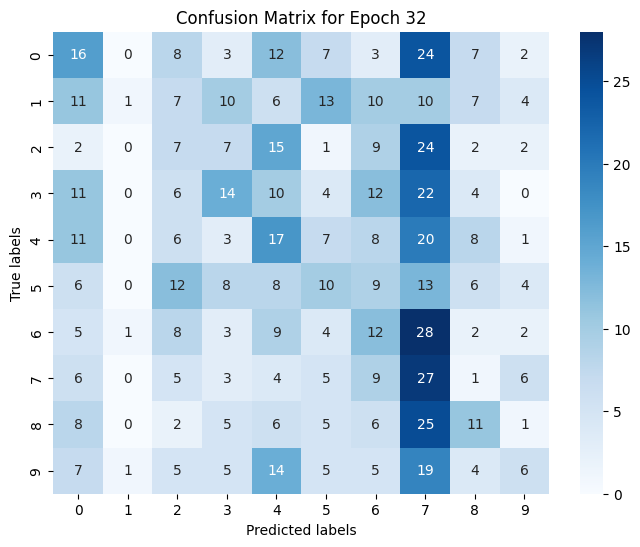

 64%|██████▍   | 32/50 [17:51<10:05, 33.61s/it]


Training Loss: 4.970, Training Accuracy: 17.47%
Validation Loss: 4.292, Validation Accuracy: 20.84%

Confusion Matrix for Epoch 33:


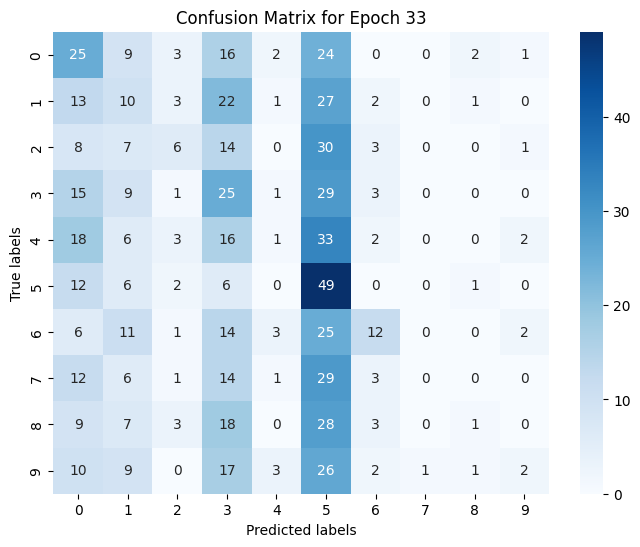

 66%|██████▌   | 33/50 [18:25<09:30, 33.54s/it]


Training Loss: 5.086, Training Accuracy: 15.07%
Validation Loss: 4.079, Validation Accuracy: 21.27%

Confusion Matrix for Epoch 34:


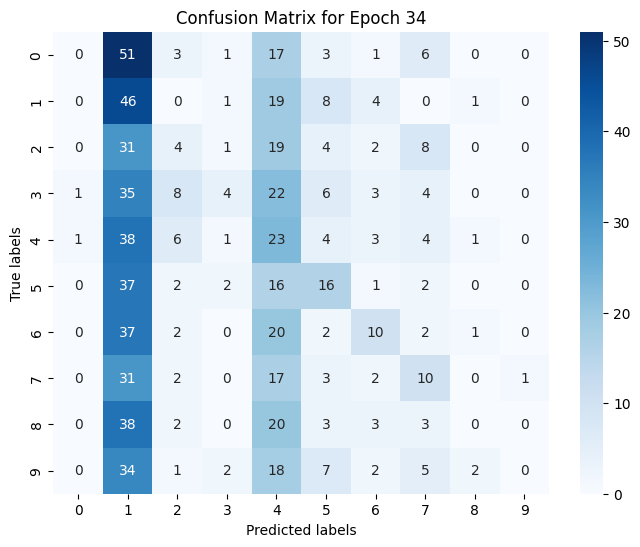

 68%|██████▊   | 34/50 [18:59<08:58, 33.65s/it]


Training Loss: 5.276, Training Accuracy: 13.60%
Validation Loss: 4.351, Validation Accuracy: 20.40%

Confusion Matrix for Epoch 35:


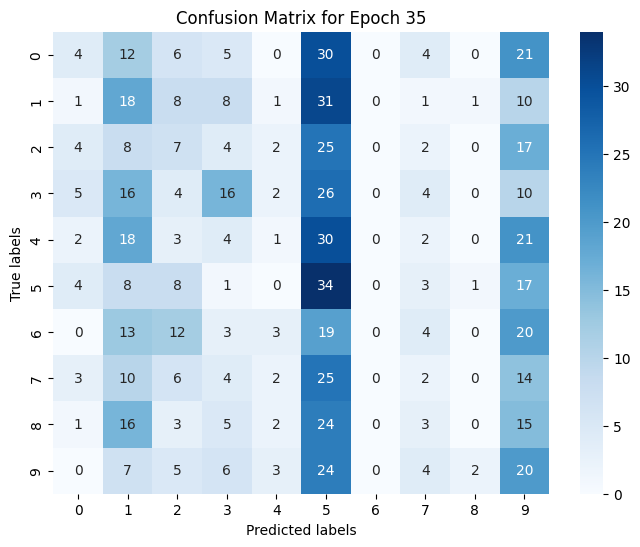

 70%|███████   | 35/50 [19:32<08:25, 33.68s/it]


Training Loss: 4.601, Training Accuracy: 13.87%
Validation Loss: 3.992, Validation Accuracy: 20.27%

Confusion Matrix for Epoch 36:


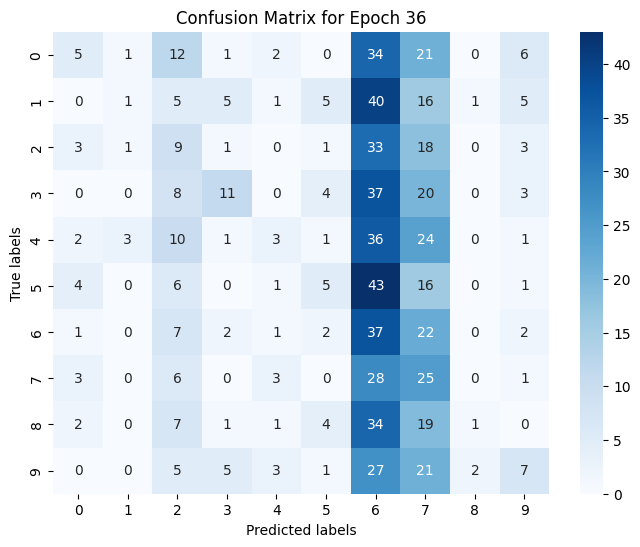

 72%|███████▏  | 36/50 [20:11<08:11, 35.12s/it]


Training Loss: 5.284, Training Accuracy: 12.53%
Validation Loss: 4.270, Validation Accuracy: 20.37%

Confusion Matrix for Epoch 37:


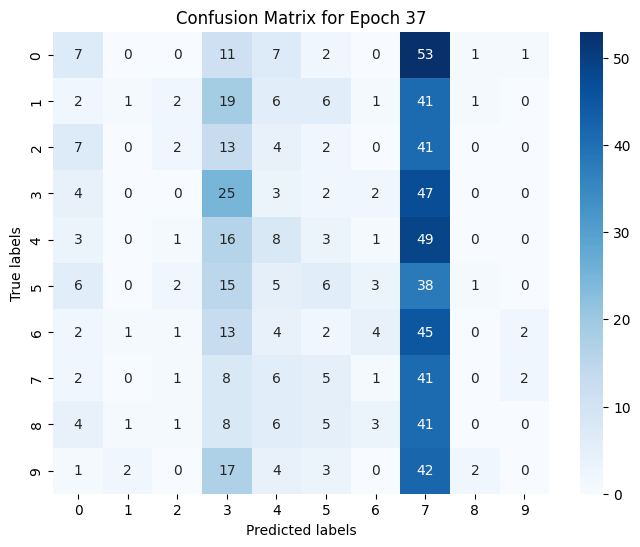

 74%|███████▍  | 37/50 [20:52<07:58, 36.83s/it]


Training Loss: 5.198, Training Accuracy: 12.40%
Validation Loss: 4.203, Validation Accuracy: 21.61%

Confusion Matrix for Epoch 38:


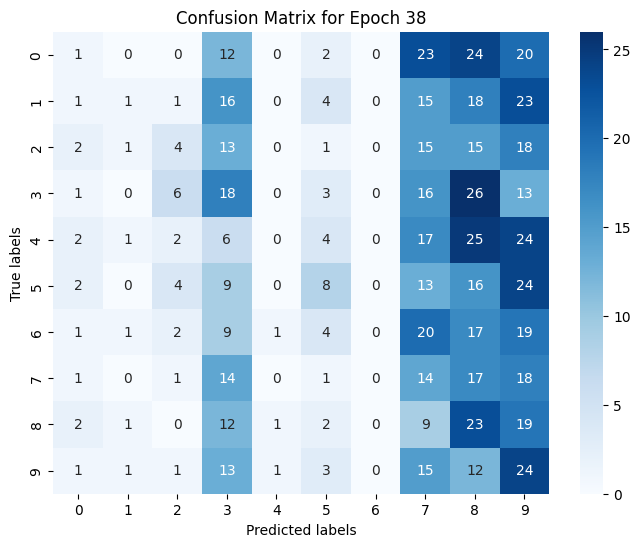

 76%|███████▌  | 38/50 [21:26<07:12, 36.03s/it]


Training Loss: 5.121, Training Accuracy: 16.13%
Validation Loss: 4.062, Validation Accuracy: 21.10%

Confusion Matrix for Epoch 39:


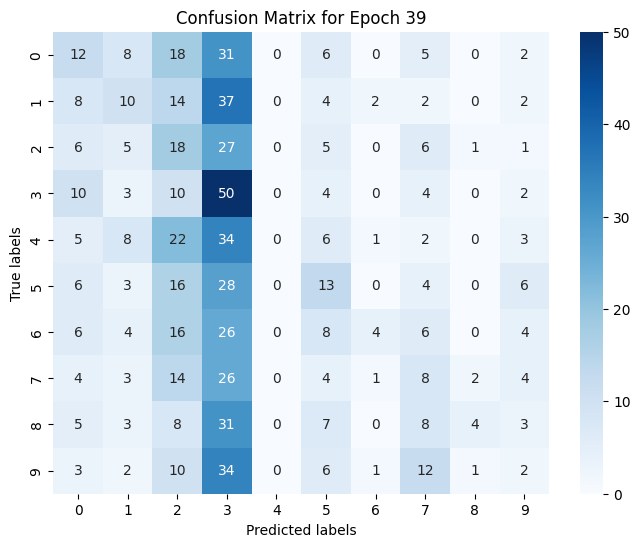

 78%|███████▊  | 39/50 [22:01<06:31, 35.61s/it]


Training Loss: 4.453, Training Accuracy: 16.40%
Validation Loss: 4.066, Validation Accuracy: 20.47%

Confusion Matrix for Epoch 40:


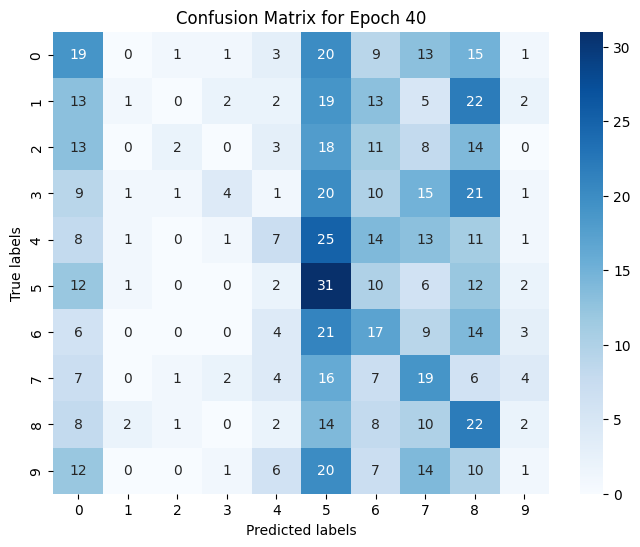

 80%|████████  | 40/50 [22:38<06:02, 36.25s/it]


Training Loss: 4.406, Training Accuracy: 18.00%
Validation Loss: 4.139, Validation Accuracy: 20.36%

Confusion Matrix for Epoch 41:


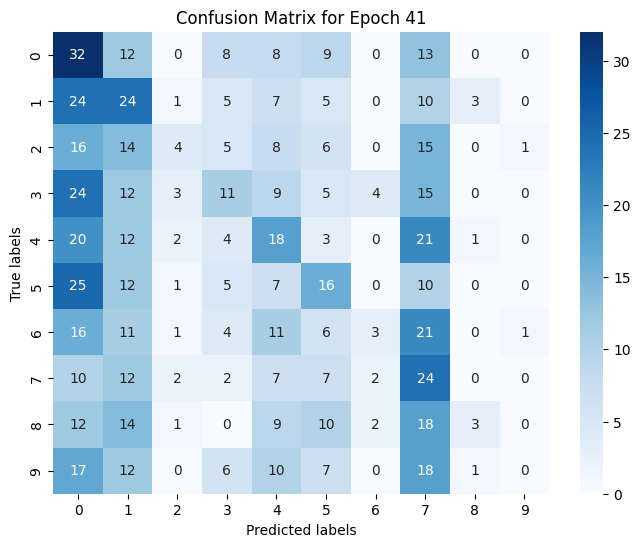

 82%|████████▏ | 41/50 [23:12<05:20, 35.58s/it]


Training Loss: 5.495, Training Accuracy: 15.07%
Validation Loss: 4.150, Validation Accuracy: 19.87%

Confusion Matrix for Epoch 42:


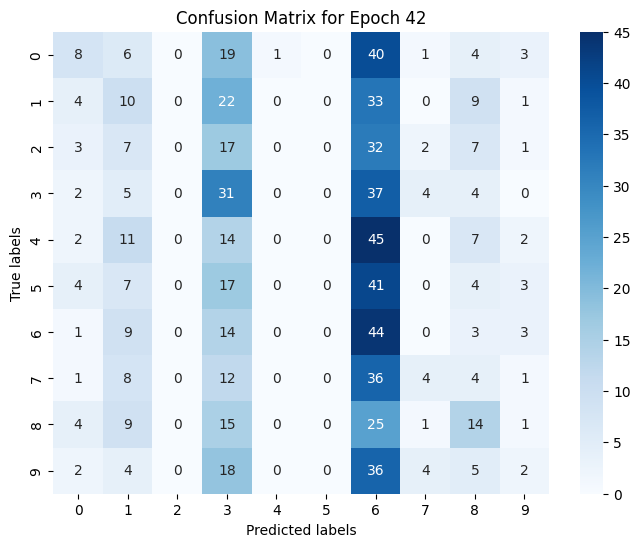

 84%|████████▍ | 42/50 [23:46<04:41, 35.13s/it]


Training Loss: 5.189, Training Accuracy: 15.60%
Validation Loss: 4.362, Validation Accuracy: 20.61%

Confusion Matrix for Epoch 43:


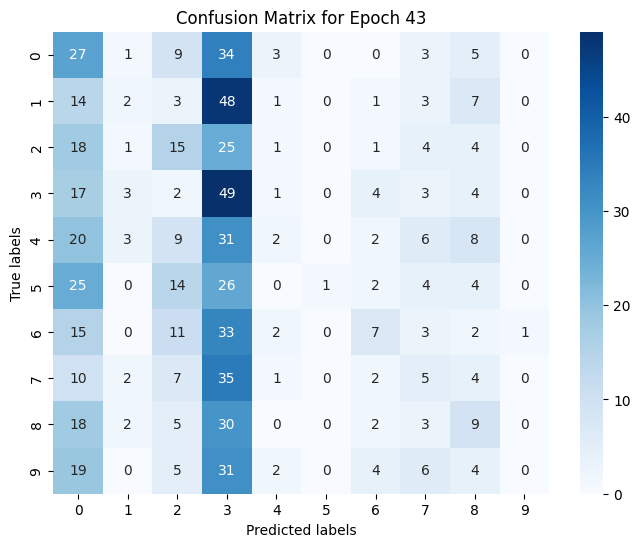

 86%|████████▌ | 43/50 [24:20<04:03, 34.75s/it]


Training Loss: 6.285, Training Accuracy: 17.47%
Validation Loss: 4.053, Validation Accuracy: 20.87%

Confusion Matrix for Epoch 44:


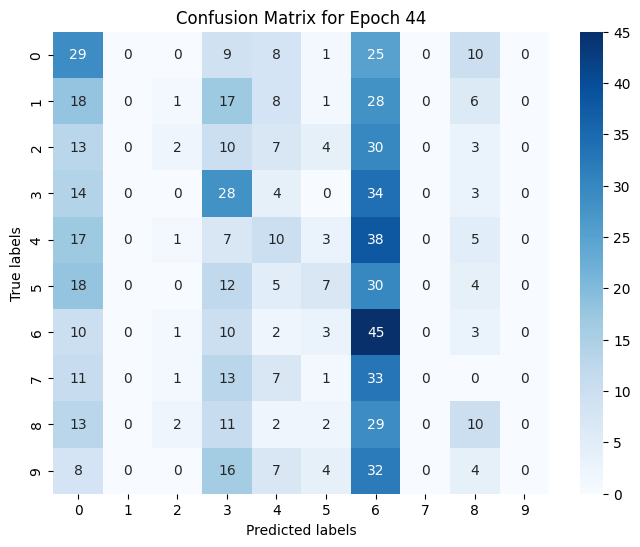

 88%|████████▊ | 44/50 [24:55<03:28, 34.77s/it]


Training Loss: 4.957, Training Accuracy: 16.00%
Validation Loss: 4.289, Validation Accuracy: 20.73%

Confusion Matrix for Epoch 45:


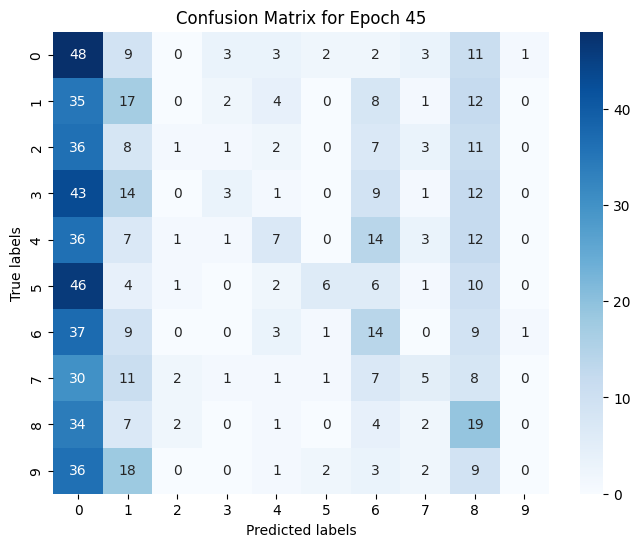

 90%|█████████ | 45/50 [25:29<02:52, 34.52s/it]


Training Loss: 4.640, Training Accuracy: 19.07%
Validation Loss: 4.225, Validation Accuracy: 20.74%

Confusion Matrix for Epoch 46:


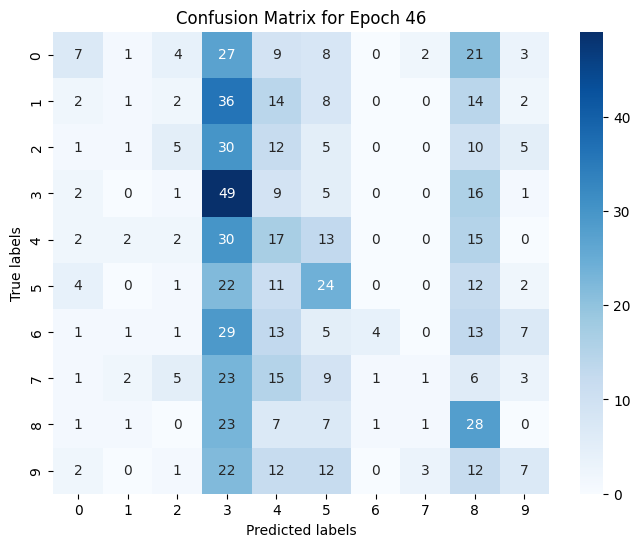

 92%|█████████▏| 46/50 [26:03<02:16, 34.23s/it]


Training Loss: 6.290, Training Accuracy: 15.47%
Validation Loss: 4.153, Validation Accuracy: 20.09%

Confusion Matrix for Epoch 47:


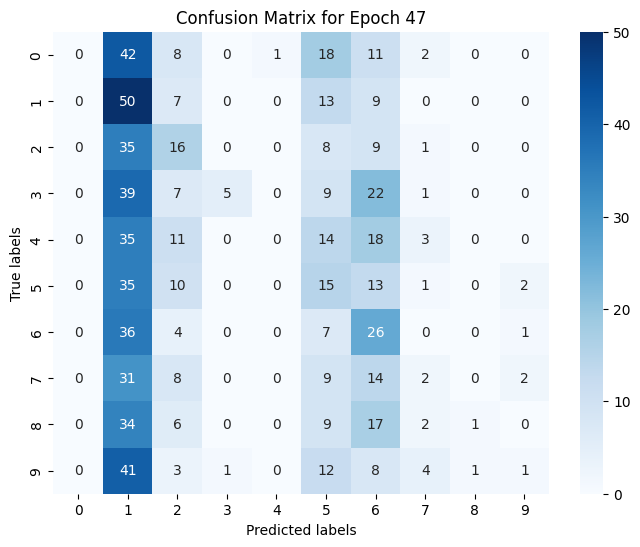

 94%|█████████▍| 47/50 [26:37<01:42, 34.19s/it]


Training Loss: 4.589, Training Accuracy: 15.47%
Validation Loss: 4.188, Validation Accuracy: 19.99%

Confusion Matrix for Epoch 48:


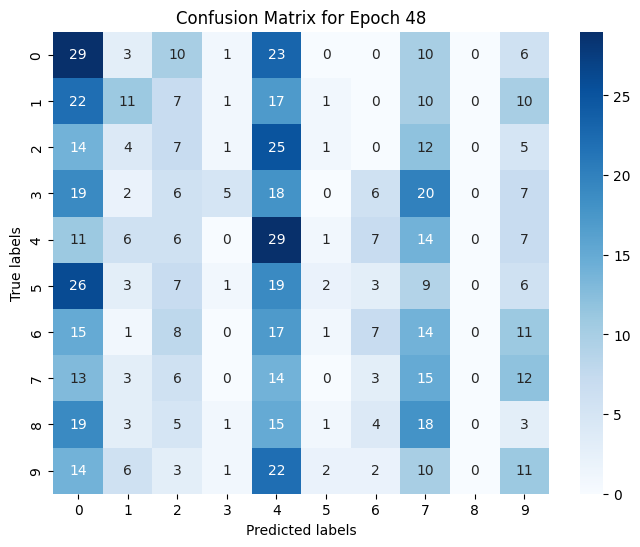

 96%|█████████▌| 48/50 [27:11<01:08, 34.11s/it]


Training Loss: 4.552, Training Accuracy: 16.13%
Validation Loss: 4.124, Validation Accuracy: 20.31%

Confusion Matrix for Epoch 49:


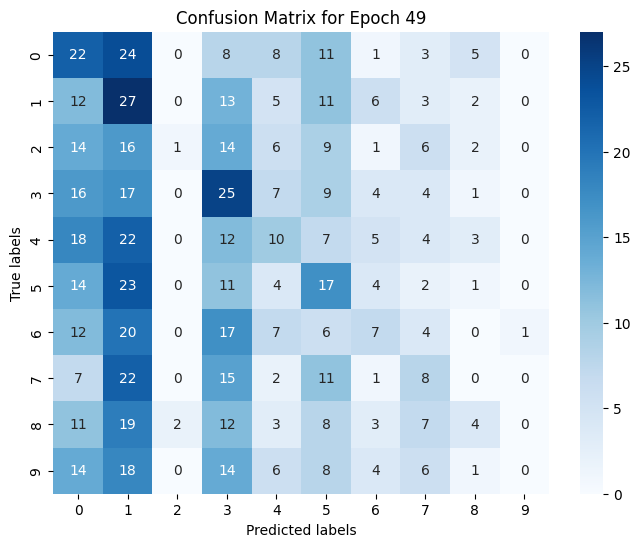

 98%|█████████▊| 49/50 [27:44<00:34, 34.02s/it]


Training Loss: 4.239, Training Accuracy: 18.27%
Validation Loss: 4.173, Validation Accuracy: 20.96%

Confusion Matrix for Epoch 50:


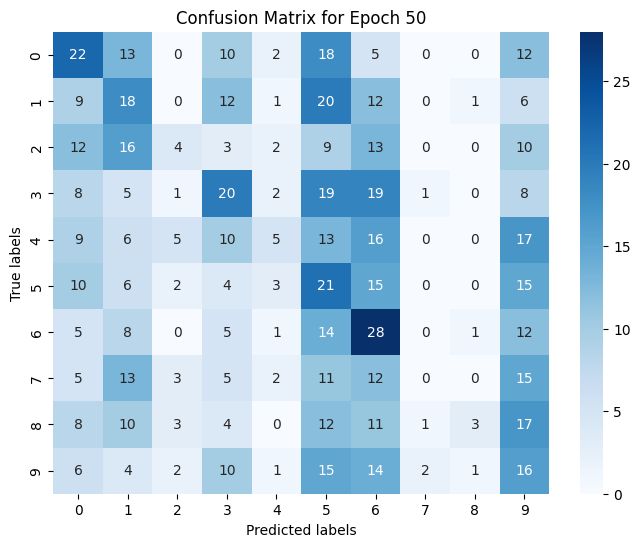

100%|██████████| 50/50 [28:18<00:00, 33.98s/it]


Training has been completed.


In [ ]:
# Lists for loss and accuracy to plot later
train_losses = []
train_accuracy = []
val_losses = []
val_accuracy = []

# Train the model - write the training loop
for epoch in tqdm(range(50)):  # loop over the dataset multiple times

    train_loss = 0.0
    train_correct = 0
    train_total = 0

    val_true_labels = []
    val_pred_labels = []

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # print(labels.shape)

        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        # calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()


    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            val_pred_labels.append(predicted)
            val_true_labels.append(labels)


    # per batch loss
    avg_val_loss = val_loss / len(valloader)
    val_accuracy.append(val_correct / val_total)
    val_losses.append(avg_val_loss)

    avg_train_loss = train_loss / len(trainloader)
    train_accuracy.append(train_correct / train_total)
    train_losses.append(avg_train_loss)

    val_true = torch.cat(val_true_labels, dim=0).cpu().numpy()
    val_pred = torch.cat(val_pred_labels, dim=0).cpu().numpy()

    # set the model back to train mode
    model.train()

    print(f'Training Loss: {avg_val_loss:.3f}, Training Accuracy: {val_accuracy[-1] * 100:.2f}%')
    print(f'Validation Loss: {avg_train_loss:.3f}, Validation Accuracy: {train_accuracy[-1] * 100:.2f}%\n')

    print(f'Confusion Matrix for Epoch {epoch + 1}:')
    conf_matrix = confusion_matrix(val_true, val_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=True)
    plt.title(f'Confusion Matrix for Epoch {epoch + 1}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    print()

print('Training has been completed.')

This code trains a neural network model, tracks its performance, and provides insights into its effectiveness through metrics such as loss, accuracy, and confusion matrix.

In [ ]:
# Display the lengths of true and predicted validation labels, as well as unique classes in true and predicted labels
len(val_true), len(val_pred), np.unique(np.array(val_true)), np.unique(np.array(val_pred))

(750,
 750,
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

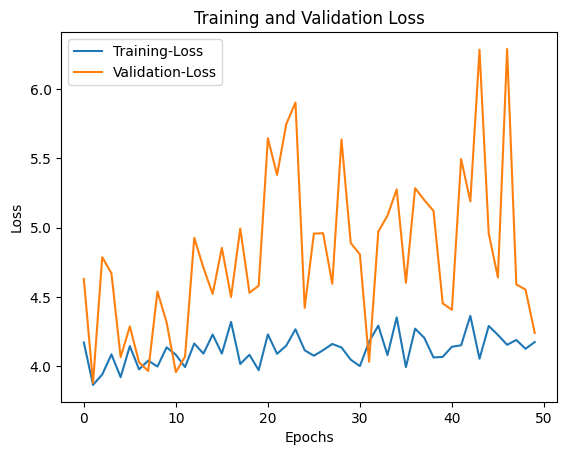

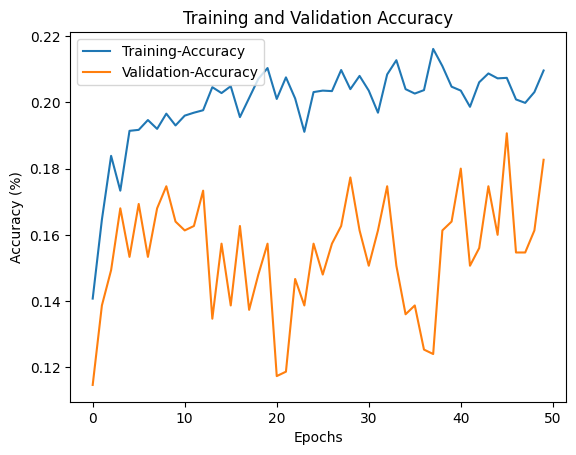

In [ ]:
# ------------------------------- Plotting -------------------------------------
# Plot training loss over time
plt.figure()
plt.plot(train_losses, label='Training-Loss')
plt.plot(val_losses, label='Validation-Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy over time
plt.figure()
plt.plot(train_accuracy, label='Training-Accuracy')
plt.plot(val_accuracy, label='Validation-Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

Training and Validation Loss: Plots the training and validation losses over epochs to visualize how the loss changes during training.

Training and Validation Accuracy: Plots the training and validation accuracies over epochs to show how the accuracy changes during training.

In [ ]:
import numpy as np

# Lists for storing true and predicted labels during testing
preds = []
img_list = []
true_labels = []

# Test the final model on the held-out test dataset
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs, 1)
        preds.extend(predicted.cpu().numpy())
        img_list.extend(images.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

Initialization: Lists are initialized to store predicted labels (preds), image data (img_list), and true labels (true_labels) during testing.

Testing Loop: The code loops through the testloader to obtain batches of images and their corresponding labels.

Model Prediction: The model predicts labels for the test images using the model and stores the predictions in the preds list.

Data Storage: The predicted labels (predicted), image data (images), and true labels (labels) are converted to NumPy arrays and stored in the respective lists (preds, img_list, true_labels).

Evaluation: This allows for evaluating the final model's performance on the held-out test dataset and conducting further analysis.






# Plotting

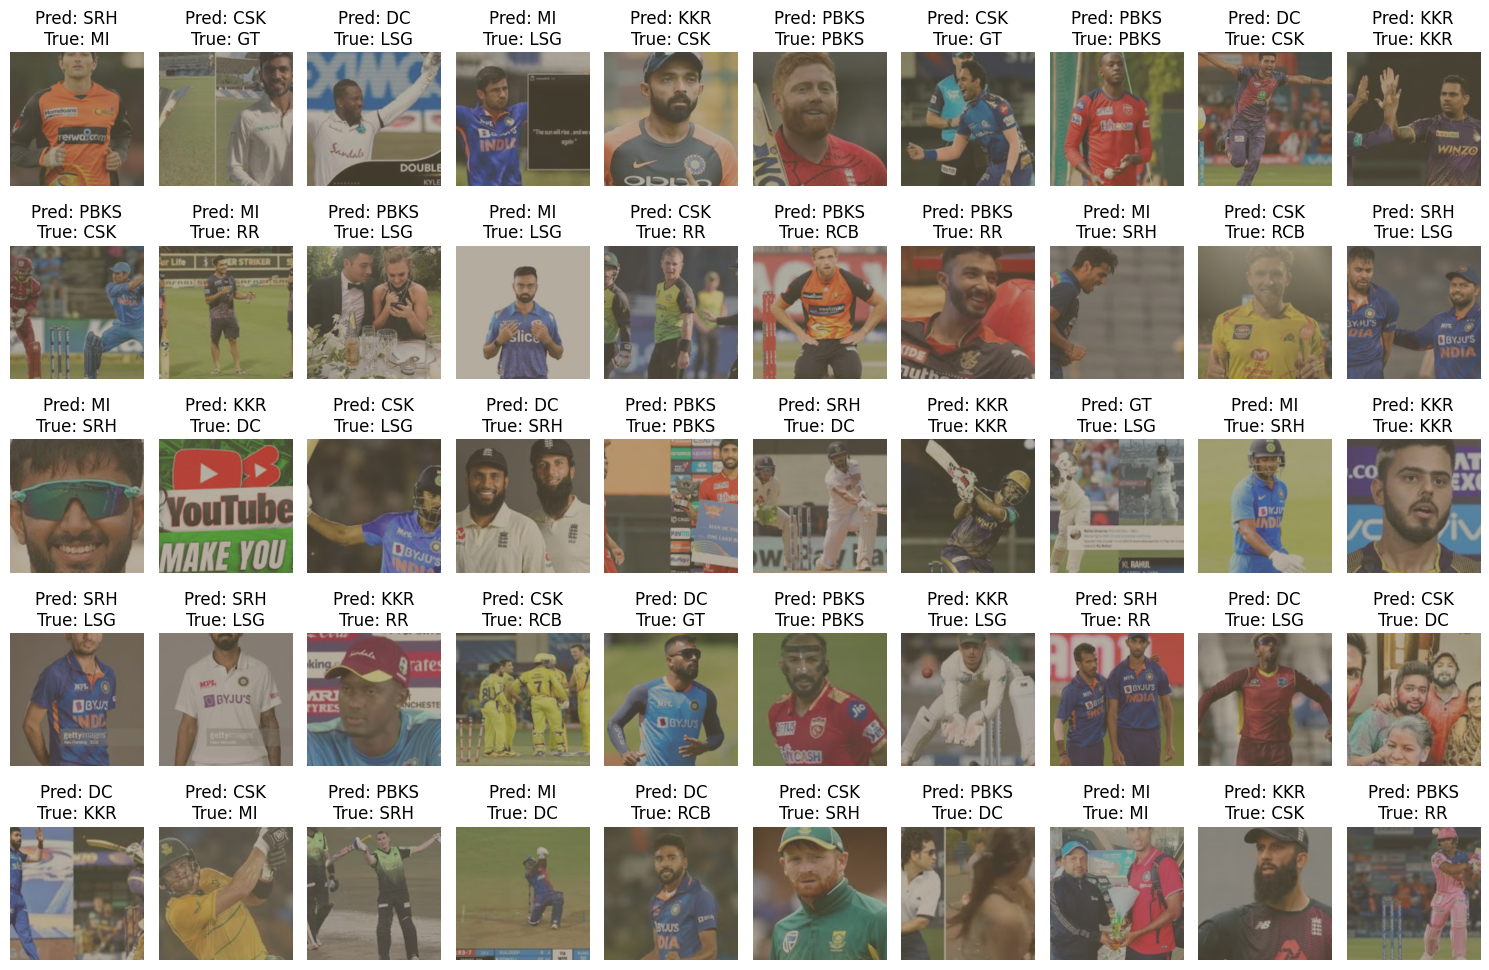

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names
class_names = ['CSK', 'DC', 'GT', 'KKR', 'LSG', 'MI', 'PBKS', 'RCB', 'RR', 'SRH']

# Standard normalization mean and standard deviation
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Define the number of rows and columns for subplots
num_rows = 5
num_cols = 10

# Calculate the total number of subplots
total_subplots = num_rows * num_cols

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterate over the predictions and true labels
for i in range(min(len(preds), total_subplots)):  # Limit the number of iterations to the total number of subplots
    ax = axes[i // num_cols, i % num_cols]  # Calculate the subplot index

    # Apply unnormalization to the image
    unnormalized_image = (img_list[i].transpose(1, 2, 0) * std) + mean
    unnormalized_image = np.clip(unnormalized_image, 0, 1)  # Clip pixel values
    ax.imshow(unnormalized_image)  # Display the unnormalized image

    # Retrieve class names for prediction and true label
    pred_class = class_names[preds[i]]
    true_class = class_names[true_labels[i]]

    ax.set_title(f"Pred: {pred_class}\nTrue: {true_class}")  # Set the title with predicted and true class names
    ax.axis('off')  # Turn off axis labels

# Hide remaining subplots if there are fewer predictions than available subplots
for j in range(len(preds), total_subplots):
    axes[j // num_cols, j % num_cols].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Normalization Parameters: Mean and standard deviation values are defined for standard normalization of images.

Subplot Configuration: The number of rows and columns for the subplots is specified.

Total Subplots Calculation: The total number of subplots is calculated based on the number of rows and columns.

Figure Creation: A figure with subplots is created using Matplotlib.

Iteration: The code iterates over the predicted labels and true labels, limited by the total number of subplots.

Unnormalization: Each image is unnormalized using the defined mean and standard deviation values.

Display: The unnormalized image is displayed in the subplot with the predicted and true labels as the title.

Axis Removal: Axis labels are turned off for better visualization.

Handling Remaining Subplots: Any remaining subplots beyond the number of predictions are hidden.

Layout Adjustment: The layout is adjusted for better spacing, and the plot is displayed.

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the final model on the test set
model.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)  # Move tensors to the same device as the model
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Collect predicted and true labels for further analysis
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate test accuracy
test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")

# Convert lists to numpy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Compute and print classification report
class_names = ['CSK', 'DC', 'GT', 'KKR', 'LSG', 'MI', 'PBKS', 'RCB', 'RR', 'SRH']  # Modify class names as per your dataset
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print classification report
print("--------------- Classification Report -----------------")
print(report)


Test Accuracy: 0.1813
--------------- Classification Report -----------------
              precision    recall  f1-score   support

         CSK       0.22      0.26      0.23        82
          DC       0.17      0.23      0.19        79
          GT       0.25      0.09      0.13        69
         KKR       0.21      0.18      0.19        83
         LSG       0.25      0.05      0.08        81
          MI       0.16      0.36      0.22        76
        PBKS       0.19      0.38      0.25        74
         RCB       0.00      0.00      0.00        66
          RR       0.44      0.06      0.10        69
         SRH       0.13      0.18      0.15        71

    accuracy                           0.18       750
   macro avg       0.20      0.18      0.16       750
weighted avg       0.20      0.18      0.16       750



Model Evaluation: The final trained model is evaluated on the test set to assess its performance.

Evaluation Loop: Using torch.no_grad(), the model predicts labels for images in the testloader.

Accuracy Calculation: The accuracy of the model on the test set is computed by comparing predicted labels with true labels.

Label Collection: Predicted and true labels are collected for further analysis and evaluation.

Conversion to NumPy Arrays: The collected labels are converted to NumPy arrays for compatibility with scikit-learn functions.

Classification Report: A classification report is generated using classification_report from scikit-learn.

Class Names: Class names are defined based on the dataset for better interpretation of the classification report.

Printing: The test accuracy and classification report are printed to evaluate the model's performance on the test set.

In [ ]:
# Test the model on test data and get confusion matrix
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        print(outputs.shape)
        _, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


y_true = np.array(y_true)
y_pred = np.array(y_pred)
print("Length of y_true:", len(y_true))
print("Length of y_pred:", len(y_pred))

torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([16, 10])
torch.Size([14, 10])
Length of y_t

Model Evaluation on Test Data: The trained model is tested on the test data to assess its performance and obtain a confusion matrix.

Evaluation Loop: The model is put in evaluation mode (model.eval()) to disable gradient calculation.

Prediction Generation: Using the testloader, the model predicts labels for the test data.

Confusion Matrix Calculation: True labels (y_true) and predicted labels (y_pred) are collected during the evaluation loop for generating the confusion matrix.

Conversion to NumPy Arrays: The collected labels are converted to NumPy arrays for further processing.

Output Inspection: The shape of the model's output tensor (outputs) is printed to ensure correct dimensions.

Results Display: The lengths of y_true and y_pred arrays are printed to verify the number of samples in both sets.

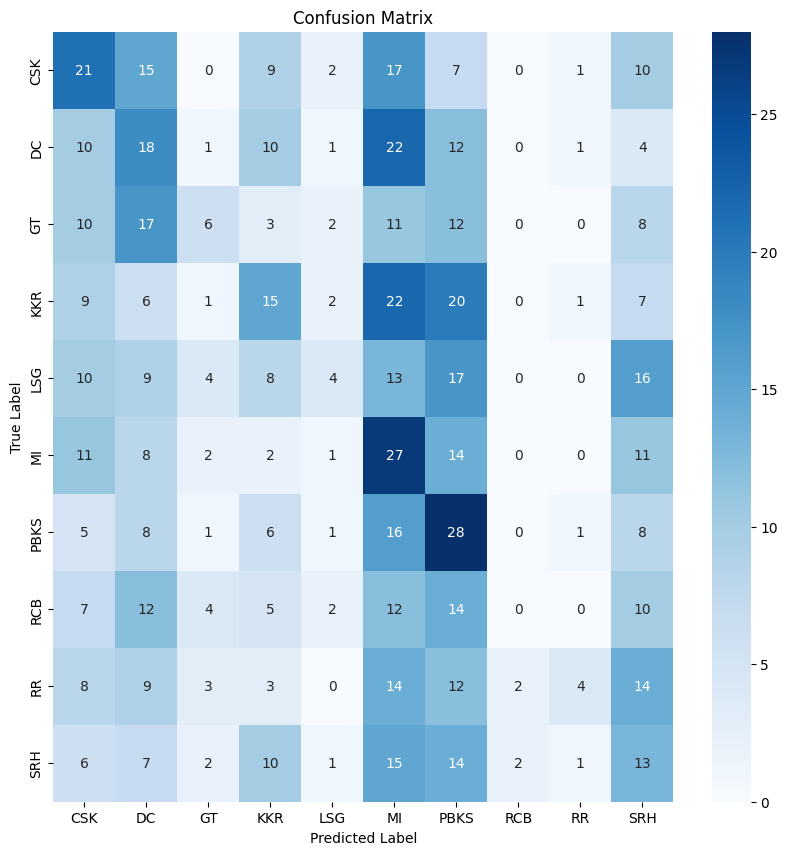

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred, labels=range(10))

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix Calculation: The confusion matrix is computed using the true labels (y_true) and predicted labels (y_pred).

Visualization: The confusion matrix is visualized using a heatmap, where each cell represents the number of instances where the true label corresponds to the row and the predicted label corresponds to the column.

Heatmap Customization: The heatmap is annotated with numerical values (annot=True) and formatted as integers (fmt='d'). The colormap 'Blues' is used to indicate the intensity of values.

Axis Labeling: The x-axis and y-axis are labeled with 'Predicted Label' and 'True Label', respectively, to indicate their meanings.

Title: The title 'Confusion Matrix' is set for the plot.

Plotting: The plot is displayed using Matplotlib's plt.show().

In [ ]:
# Print F1 score

f1 = f1_score(y_true, y_pred, average='weighted')

print('F1 Score:', f1)

F1 Score: 0.158907805345591


F1 Score Calculation: The F1 score is computed using the true labels (y_true) and predicted labels (y_pred) with the f1_score function.

Weighted Average: The F1 score is calculated as a weighted average across classes, where each class contributes proportionally to its support (number of instances).

Print: The computed F1 score is printed to evaluate the overall performance of the classification model.